In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

# Load Data

In [3]:
dataPath =  "/content/drive/MyDrive/NN-DL/CA01/Q4_Dataset/CarPrice_Assignment.csv"
df = pd.read_csv(dataPath)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
dfcopy = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Preprocess

## Check NaN

In [6]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Find Company Names

In [7]:
companyName  = df["CarName"].str.split(" ", expand=True)
companyName[companyName.columns[0]]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: 0, Length: 205, dtype: object

In [8]:
df["companyName"]  = companyName[companyName.columns[0]]

## Delete Some Unimportant Columns 

In [9]:
column2delete = ["CarName", "car_ID", "symboling"]
df = df.drop(column2delete,  axis =1)

In [11]:
df["companyName"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: companyName, dtype: int64

## Edit CompanyNames Column

In [12]:
df["companyName"][df["companyName"] == "vokswagen"] = "volkswagen"
df["companyName"][df["companyName"] == "Nissan"] = 'nissan'
df["companyName"][df["companyName"] == "nisan"] = 'nissan'
df["companyName"][df["companyName"] == "toyouta"] = "toyota"
df["companyName"][df["companyName"] == "maxda"] = "mazda"
df["companyName"][df["companyName"] == "porcshce"] = 'porsche'


<ipython-input-12-bccd18323596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["companyName"][df["companyName"] == "vokswagen"] = "volkswagen"
<ipython-input-12-bccd18323596>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["companyName"][df["companyName"] == "Nissan"] = 'nissan'
<ipython-input-12-bccd18323596>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["companyName"][df["companyName"] == "nisan"] = 'nissan'
<ipython-i

In [13]:
df["companyName"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
mercury         1
Name: companyName, dtype: int64

## Encode Categorical Data to OneHot

In [15]:
def cat2num(dataframe, categorical):
    cat2num = pd.get_dummies(dataframe[categorical])
    dataframe = pd.concat([dataframe, cat2num], axis="columns")
    dataframe = dataframe.drop([categorical] ,axis = 1)

    return dataframe


In [16]:
df = cat2num(df,'carbody')
df = cat2num(df,'fueltype')
df = cat2num(df, 'drivewheel')
df = cat2num(df, 'doornumber')
df = cat2num(df, 'enginelocation')
df = cat2num(df, "enginetype")
df = cat2num(df, "cylindernumber")
df = cat2num(df, "aspiration") 
df = cat2num(df, 'fuelsystem')
df =  cat2num(df, 'companyName')

## Correlation Matrix

In [19]:
corrmat = dfcopy.corr()

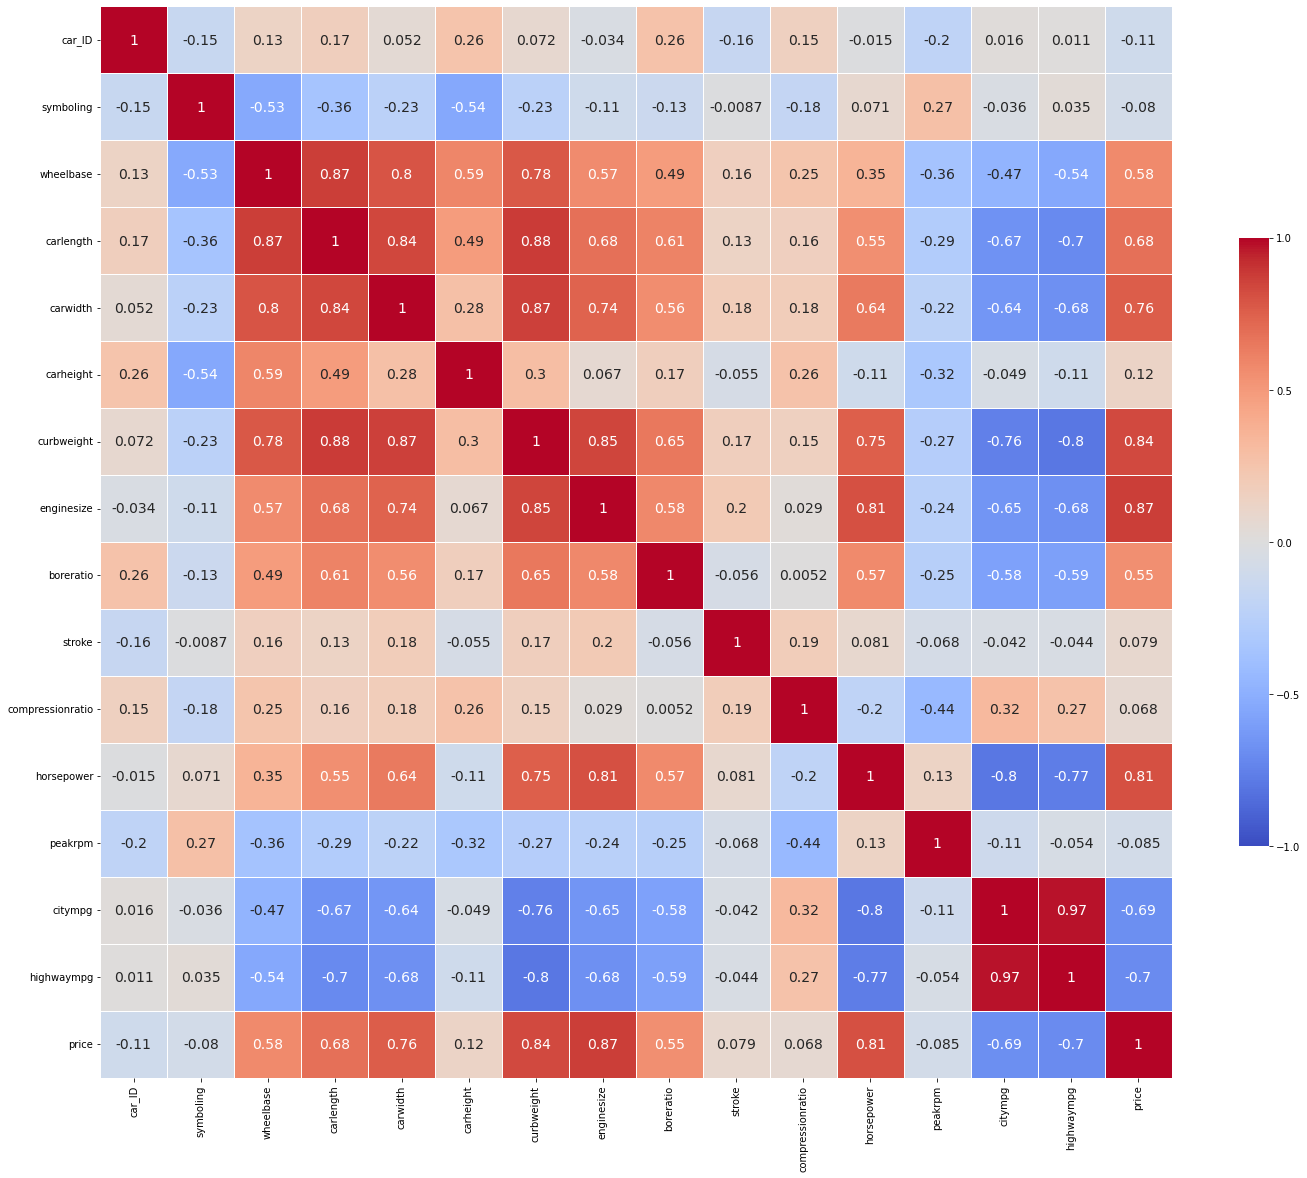

In [20]:
f, ax = plt.subplots(figsize=(24, 28))
heatmap = sns.heatmap(corrmat,
                      #mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4,
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 14})

#add the column names as labels
ax.set_yticklabels(corrmat.columns, rotation = 0)
ax.set_xticklabels(corrmat.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Car Price Histogram

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


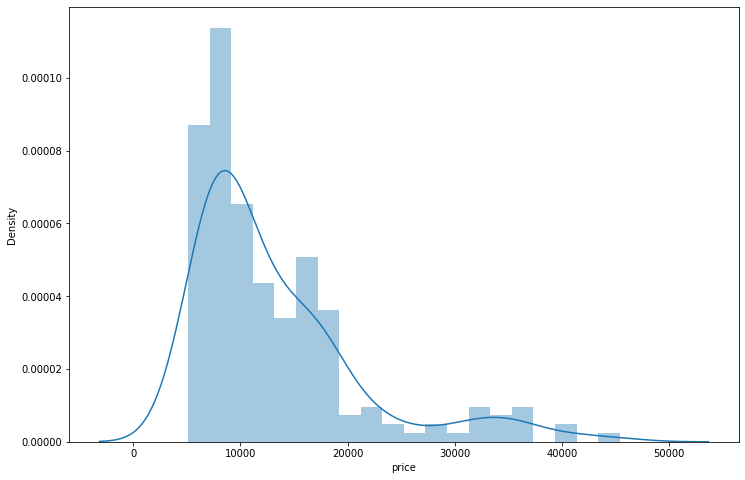

In [22]:
plt.figure(figsize=(12, 8))
sns.distplot(df['price'], hist=True, label='Price', bins=20) # Using Seaborn
plt.show()

## Relation between Prcice and EngineSize 

<Figure size 1152x648 with 0 Axes>

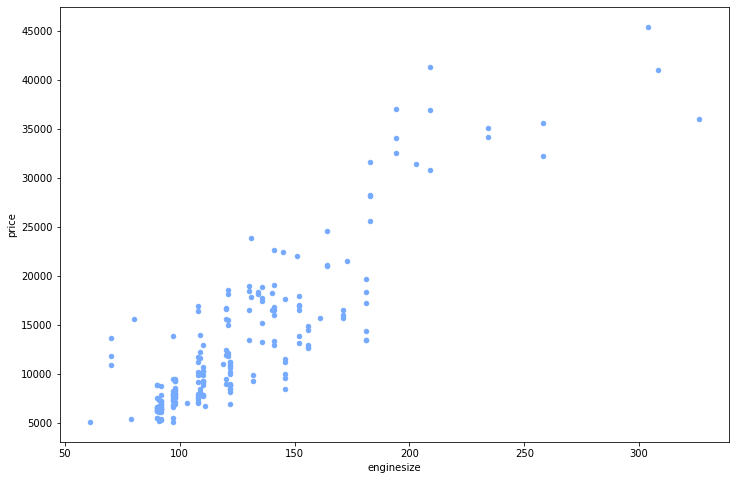

In [23]:
#scatter = sns.pairplot(data = df[["price", "enginesize"]], size =6)
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(figsize = (16, 9))
df.plot.scatter(x = "enginesize", y = "price", c = "#75AAFF")
plt.show()

## Split Data To Train and Test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.loc[:,~df.columns.isin(['price'])]
y = df[["price"]] 
Xtrain, Xtest, ytrain,  ytest =  train_test_split(X,y, test_size= 0.15, random_state=2023)
Xtrain.shape, Xtest.shape, ytrain.shape,  ytest.shape
ytrain, ytest = np.array(ytrain),  np.array(ytest)

## Standardization, Normalization and Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
xscaler = MinMaxScaler()
Xtrain = xscaler.fit_transform(Xtrain)
Xtest = xscaler.transform(Xtest)

# Create a MLP model

In [28]:
!pip install torcheval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 10.3 MB/s eta 0:00:00


In [30]:
import torch
from torch import nn
import torch.nn.functional as F
from torcheval.metrics import R2Score

## Build Models with 1,2,3 Hidden Layers

In [31]:
class MLP1H(torch.nn.Module):
    def __init__(self): 
        super(MLP1H, self).__init__() 
        self.linear1 = torch.nn.Linear(74, 100)
        self.linear2 = torch.nn.Linear(100, 1)
   
    def forward(self, x): 
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

class MLP2H(torch.nn.Module):
    def __init__(self): 
        super(MLP2H, self).__init__() 
        self.linear1 = torch.nn.Linear(74, 512)
        self.linear2 = torch.nn.Linear(512, 100)
        self.linear3 = torch.nn.Linear(100, 1)
    def forward(self, x): 
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

class MLP3H(torch.nn.Module):
    def __init__(self): 
        super(MLP3H, self).__init__() 
        self.linear1 = torch.nn.Linear(74, 512)
        self.linear2 = torch.nn.Linear(512, 256)
        self.linear3 = torch.nn.Linear(256, 64)
        self.linear4 = torch.nn.Linear(64, 1)

    def forward(self, x): 
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x


## Data Loader

In [32]:
xtrain, xtest, ytrain, ytest = torch.Tensor(Xtrain), torch.Tensor(Xtest), torch.Tensor(ytrain), torch.Tensor(ytest)
data_batch = torch.utils.data.TensorDataset(xtrain, ytrain)
dataloader = torch.utils.data.DataLoader(data_batch, batch_size=8)

## Model Training Loop

In [33]:
def trainMLP(model, loss, opt, epochs):
    trainErrors, valErrors = [], []
    for epoch in range(epochs): 
        for x_batch, y_batch in dataloader:
            predict_y = model(x_batch) 
            l = loss(predict_y, y_batch)
            opt.zero_grad() 
            l.backward()
            opt.step() 
        trainErrors.append(l.item())
        with torch.no_grad():
            y_pred = model(xtest)
            l_test = loss(y_pred, ytest)
            valErrors.append(l_test.item())
    metric = R2Score()
    metric.update(y_pred, ytest)
    print(metric.compute().numpy())
    r2Metric =  metric.compute().numpy()
    return model, trainErrors, valErrors, r2Metric  


In [44]:
def plotResults(model,trainError, valError,r2,  modelName ):
    plt.plot(trainError, label='train_error')
    plt.plot(valError, label='validation_error')
    plt.title('Loss' + modelName + " R2 score : " + str(round(float(r2), 4)),fontsize=18)
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

In [34]:
!pip install torchsummary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from torchsummary import summary

In [41]:
model1hidden = MLP1H()
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(model1hidden.parameters(), lr=0.001)

summary(model1hidden, (74,), batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           7,500
            Linear-2                    [-1, 1]             101
Total params: 7,601
Trainable params: 7,601
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [42]:
model1hidden, trainErrors, valErrors, r2 = trainMLP(model1hidden, loss, opt, 400)

0.679178


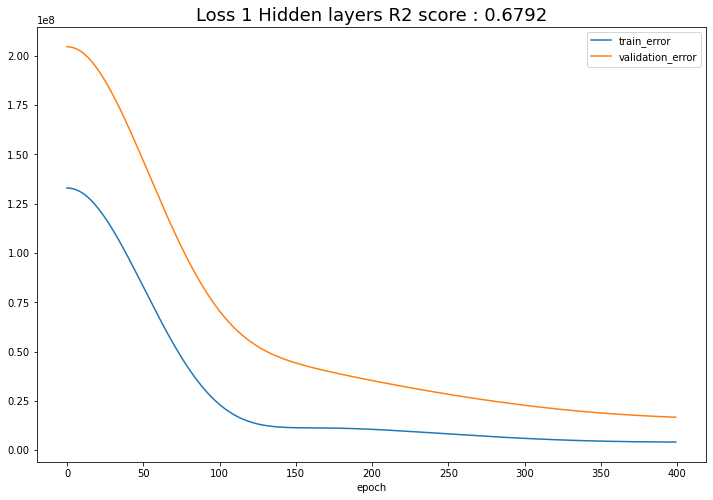

In [45]:
plotResults(model1hidden, trainErrors, valErrors,r2 , " 1 Hidden layers" )

In [46]:
model2hidden = MLP2H()
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(model2hidden.parameters(), lr=0.001)
summary(model2hidden, (74,), batch_size=-1)
model2hidden, trainErrors, valErrors, r2 = trainMLP(model2hidden, loss, opt, 300)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          38,400
            Linear-2                  [-1, 100]          51,300
            Linear-3                    [-1, 1]             101
Total params: 89,801
Trainable params: 89,801
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.34
Estimated Total Size (MB): 0.35
----------------------------------------------------------------
0.86037713


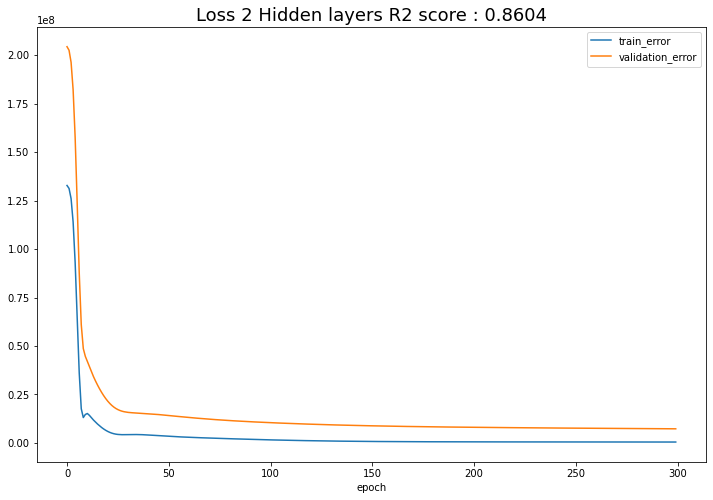

In [47]:
plotResults(model2hidden, trainErrors, valErrors,r2,  " 2 Hidden layers")

In [48]:
model3hidden = MLP3H()
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(model3hidden.parameters(), lr=0.001)
summary(model3hidden, (74,), batch_size=-1)
model3hidden, trainErrors, valErrors, r2 = trainMLP(model3hidden, loss, opt, 300)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          38,400
            Linear-2                  [-1, 256]         131,328
            Linear-3                   [-1, 64]          16,448
            Linear-4                    [-1, 1]              65
Total params: 186,241
Trainable params: 186,241
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.71
Estimated Total Size (MB): 0.72
----------------------------------------------------------------
0.8964818


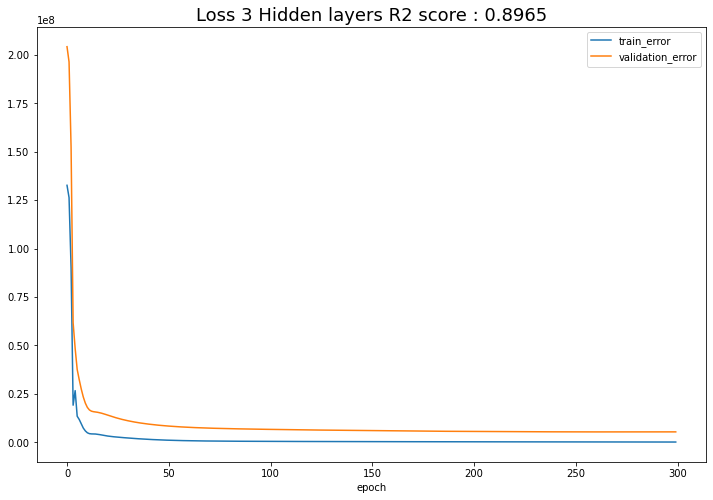

In [49]:
plotResults(model3hidden, trainErrors, valErrors,r2, " 3 Hidden layers")

### 3 hidden layer Huber and Adam 

In [51]:
model3hidden = MLP3H()
loss = torch.nn.HuberLoss()
opt = torch.optim.Adam(model3hidden.parameters(), lr=0.001)

0.86607456


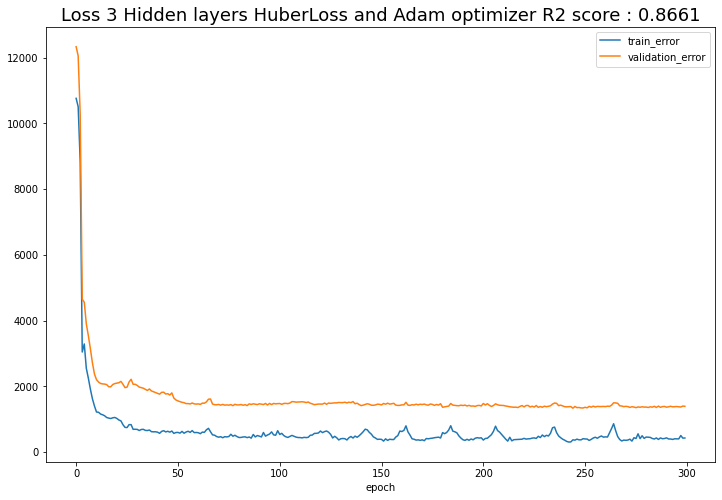

In [52]:
model3hidden, trainErrors, valErrors, r2 = trainMLP(model3hidden, loss, opt, 300)
plotResults(model3hidden, trainErrors, valErrors,r2, " 3 Hidden layers HuberLoss and Adam optimizer")

### 3 hidden layer RMSprob and Huber Loss

In [53]:
model3hidden = MLP3H()
loss = torch.nn.HuberLoss()
opt = torch.optim.RMSprop(model3hidden.parameters(), lr=0.0005)

0.8452594


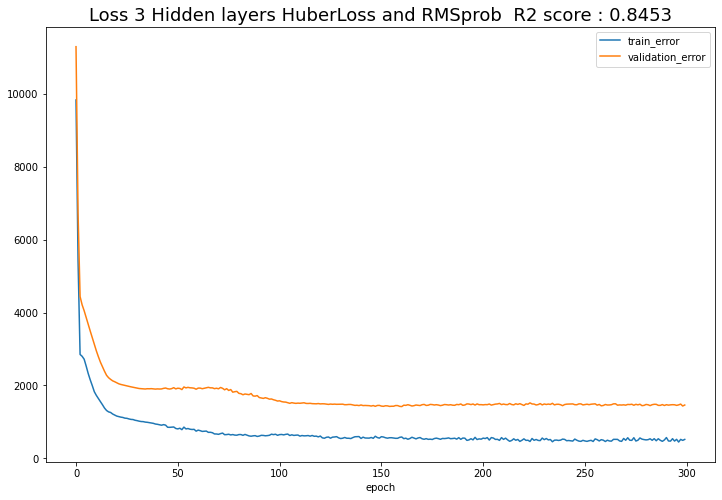

In [54]:
model3hidden, trainErrors, valErrors,r2 = trainMLP(model3hidden, loss, opt, 300)
plotResults(model3hidden, trainErrors, valErrors,r2, " 3 Hidden layers HuberLoss and RMSprob ")

### 3 hidden layers RMSprob and MSE

In [56]:
model3hidden = MLP3H()
loss = torch.nn.MSELoss()
opt = torch.optim.RMSprop(model3hidden.parameters(), lr=0.001)

0.8944856


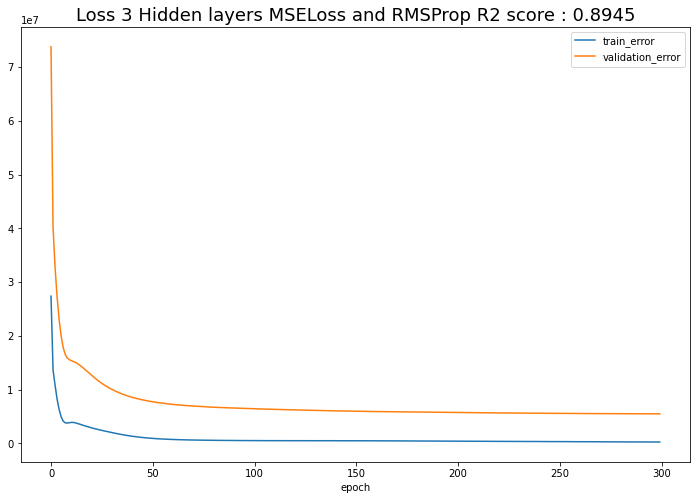

In [57]:
model3hidden, trainErrors, valErrors, r2 = trainMLP(model3hidden, loss, opt, 300)
plotResults(model3hidden, trainErrors, valErrors,r2, " 3 Hidden layers MSELoss and RMSProp")

### 3 Hidden layers MSELoss and Adam Optimizer

In [58]:
model3hidden = MLP3H()
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(model3hidden.parameters(), lr=0.001)

0.8963201


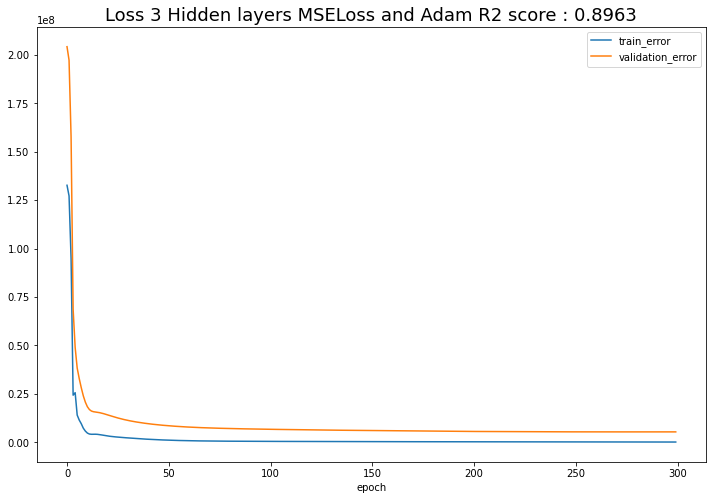

In [59]:
model3hidden, trainErrors, valErrors, r2 = trainMLP(model3hidden, loss, opt, 300)
plotResults(model3hidden, trainErrors, valErrors,r2, " 3 Hidden layers MSELoss and Adam")

## predict 5 test samples

In [ ]:
len(ytest)

31

In [ ]:
idxs = torch.randint(0,len(ytest), (5,)).numpy()
ytest[idxs]


tensor([[21485.],
        [13845.],
        [ 9639.],
        [10595.],
        [ 6938.]])

In [ ]:
y_pred = model3hidden(xtest[idxs])
y_pred

tensor([[21336.1816],
        [11033.5361],
        [11701.9346],
        [ 9553.1904],
        [ 8048.4937]], grad_fn=<AddmmBackward0>)

In [ ]:
with torch.no_grad():
    y_pred = model3hidden(xtest[idxs])
    a = print((ytest[idxs] - y_pred))
    #l_test = loss(y_pred, ytest)
    #val_errors.append(l_test.item())

tensor([[  148.8184],
        [ 2811.4639],
        [-2062.9346],
        [ 1041.8096],
        [-1110.4937]])


In [ ]:
(ytest[idxs]- y_pred)/ytest[idxs]

tensor([[ 0.0069],
        [ 0.2031],
        [-0.2140],
        [ 0.0983],
        [-0.1601]], grad_fn=<DivBackward0>)